In [1]:
#import openpyxl
import pandas as pd
import numpy as np

# .. OBS Data load
#read_dir = "D:\KMK_DATA\OBS\HOURLY\\"
read_dir = "../DATA/"
read_list = [
    "47105_OBS_ASOS_TIM_20210101_20211231.csv",
    "47105_OBS_ASOS_TIM_20220101_20221231.csv",
    "47105_OBS_ASOS_TIM_20230101_20230630.csv"
]
set_col = ['지점', '지점명', '일시', '풍속(m/s)', '풍향(16방위)']

df1 = pd.DataFrame()
for file in read_list:
    read_file = read_dir + file
    #print(read_file)
    df = pd.read_csv(read_file, encoding='cp949')
    df1 = pd.concat([df1, df], axis=0, ignore_index=True)


df1 = df1[set_col]
df1['일시'] = pd.to_datetime(df1['일시'])
print(df1)




        지점 지점명                  일시  풍속(m/s)  풍향(16방위)
0      105  강릉 2021-01-01 00:00:00      4.7     230.0
1      105  강릉 2021-01-01 01:00:00      3.4     250.0
2      105  강릉 2021-01-01 02:00:00      2.8     230.0
3      105  강릉 2021-01-01 03:00:00      1.5     230.0
4      105  강릉 2021-01-01 04:00:00      3.4     230.0
...    ...  ..                 ...      ...       ...
21854  105  강릉 2023-06-30 19:00:00      0.3       0.0
21855  105  강릉 2023-06-30 20:00:00      1.1     140.0
21856  105  강릉 2023-06-30 21:00:00      0.5      70.0
21857  105  강릉 2023-06-30 22:00:00      0.9      50.0
21858  105  강릉 2023-06-30 23:00:00      0.5     320.0

[21859 rows x 5 columns]


In [2]:
df1.info() 
df1.tail()

# 10개 nan 있고, 2개 결측 있음 
# 2021.01.01.00 ~ 2023.06.30.23.00(실제 n=)
# 데이타: n=21859

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21859 entries, 0 to 21858
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점        21859 non-null  int64         
 1   지점명       21859 non-null  object        
 2   일시        21859 non-null  datetime64[ns]
 3   풍속(m/s)   21849 non-null  float64       
 4   풍향(16방위)  21849 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 854.0+ KB


,지점,지점명,일시,풍속(m/s),풍향(16방위)
21854,105,강릉,2023-06-30 19:00:00,0.3,0.0
21855,105,강릉,2023-06-30 20:00:00,1.1,140.0
21856,105,강릉,2023-06-30 21:00:00,0.5,70.0
21857,105,강릉,2023-06-30 22:00:00,0.9,50.0
21858,105,강릉,2023-06-30 23:00:00,0.5,320.0


In [3]:
from metpy.calc import wind_components
from metpy.units import units

#df['새로운변수'] = df.apply(lambda x: sample_function(x.변수1, x.변수2, ...), axis = 1)

def wind_to_uv(spd, dir):
    a = wind_components(spd * units('m/s'), dir * units.deg)
    return np.array(a[0]),np.array(a[1])

u_list, v_list = [], []
for i in range(df1.shape[0]):
    u, v = wind_to_uv(df1['풍속(m/s)'][i], df1['풍향(16방위)'][i])
    u_list.append(u)
    v_list.append(v)
#u, v = wind_to_uv(df1['풍속(m/s)'], df1['풍향(16방위)'])
print("ulist len: ", len(u_list))
#u.shape
df1['U_comp.'] = np.round(u_list, 2)
df1['V_comp.'] = np.round(v_list, 2)

df1 = df1.set_index('일시')
print(df1.loc['2022-05-31 09:00:00'])

ulist len:  21859
지점            105
지점명            강릉
풍속(m/s)       3.6
풍향(16방위)    320.0
U_comp.      2.31
V_comp.     -2.76
Name: 2022-05-31 09:00:00, dtype: object


In [4]:
print(df1.info())
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21859 entries, 2021-01-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        21859 non-null  int64  
 1   지점명       21859 non-null  object 
 2   풍속(m/s)   21849 non-null  float64
 3   풍향(16방위)  21849 non-null  float64
 4   U_comp.   21849 non-null  float64
 5   V_comp.   21849 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB
None
지점           0
지점명          0
풍속(m/s)     10
풍향(16방위)    10
U_comp.     10
V_comp.     10
dtype: int64


In [5]:
# 결측치의 index 번호 찾기
mask = df1['U_comp.'].isnull()
index_list = df1.index[mask]

print(index_list)

#print(df1.index)
# with open('./print_dates.txt', 'w', encoding='cp949') as f:
#     for i in df1.index:
#         print(i, file=f)

DatetimeIndex(['2022-03-19 09:00:00', '2022-03-19 10:00:00',
               '2022-03-19 11:00:00', '2022-07-13 14:00:00',
               '2022-09-08 06:00:00', '2022-09-08 07:00:00',
               '2022-09-08 08:00:00', '2022-09-08 09:00:00',
               '2022-09-08 10:00:00', '2022-09-08 11:00:00'],
              dtype='datetime64[ns]', name='일시', freq=None)


In [7]:
#df1.loc['2022-03-19 09:00:00']
#df1.loc['2021-10-27 01:00:00'] # 결측 NaN, 진짜 없음 결측
#df1.loc['2021-12-31 02:00:00']

### df1 plot

<Axes: >

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


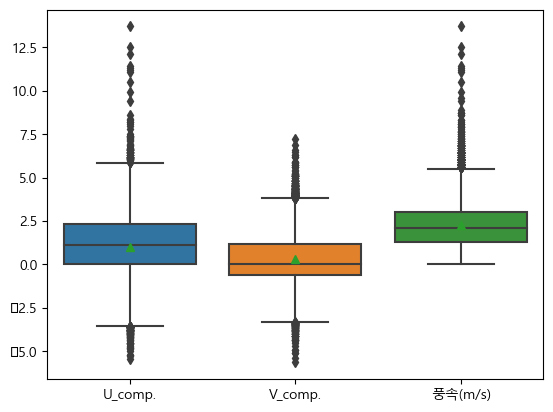

In [8]:
# .. u,v kde plot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# .. u,v box plot
import matplotlib.pyplot as plt
import seaborn as sns
#df1.boxplot(column=['U_comp.','V_comp.'])

sns.boxplot(data=df1[['U_comp.','V_comp.','풍속(m/s)']], showmeans=True)

In [9]:
#df1.columns = ['stn_id', 'stn_name', 'spd', 'dir', "U", "V"]
#df1.head()

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


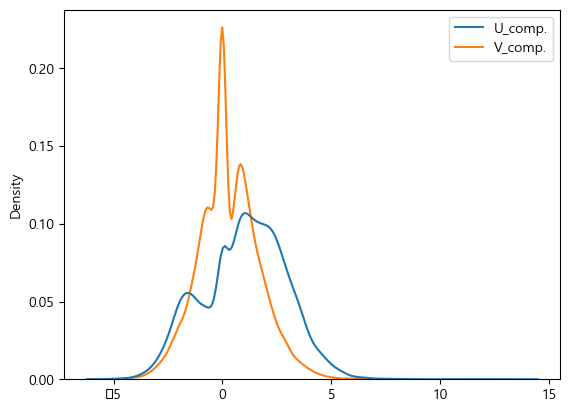

In [11]:
sns.kdeplot(df1[['U_comp.','V_comp.']])
plt.show()


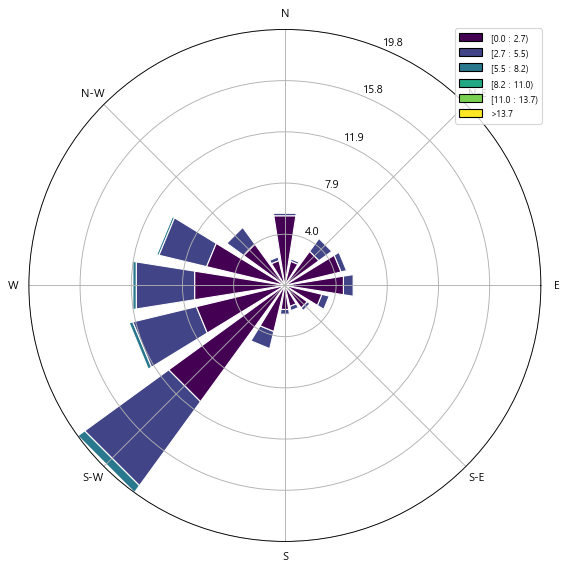

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

# Create the windrose plot
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df1['풍향(16방위)'], df1['풍속(m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc="best")

### 훈련용 obs_dat 추출

In [36]:
# .. extract date
#data_dates = pd.date_range('2021-01-01 00:00:00', '2023-06-30 23:00:00', freq='H')
set_dates = pd.date_range('2021-01-14 09:00:00', '2023-05-31 09:00:00', freq='D')
#print("data day수: ", len(data_dates))
print("있어야할 day수: ", len(set_dates))


# rdates = pd.date_range('2022-03-19 09:00:00', periods=48, freq='H')
# print('1111', set_dates[0:2])


# make (batch, sequence=48, feature=[u,v])
obs_data = np.full( (len(set_dates),48,2), np.nan )


for i,day in enumerate(set_dates):
   rdates = pd.date_range(day, periods=48, freq='H')
   #if(len(set_dates)-1==i): print(rdates[0])
   try:
      for j, rdate in enumerate(rdates):
         obs_data[i,j,0] = df1.loc[rdate,'U_comp.']
         obs_data[i,j,1] = df1.loc[rdate,'V_comp.']
   except Exception as e:
      print("error: ", e)  # nan으로 있지도 않은 자료


있어야할 day수:  868
error:  Timestamp('2021-10-27 01:00:00')
error:  Timestamp('2021-10-27 01:00:00')
error:  Timestamp('2022-08-26 01:00:00')
error:  Timestamp('2022-08-26 01:00:00')


In [15]:
rdates = pd.date_range('2023-05-31 09:00:00', periods=48, freq='H')
#print(rdates)
test_spd = df1.loc[rdates,'풍속(m/s)']
test_dir = df1.loc[rdates,'풍향(16방위)']


print(df1.loc['2023-05-31 09:00:00'])

지점           105
지점명           강릉
풍속(m/s)      0.9
풍향(16방위)    70.0
U_comp.    -0.85
V_comp.    -0.31
Name: 2023-05-31 09:00:00, dtype: object


In [16]:
# np.array 결측 제거 테스트
# a = np.array([[1,2,3],[4,5,6],[7,8,np.nan]])
# print(a.shape)
# mask = np.isnan(a).any(axis=0)
# b = a[~mask]
# print(b.shape)


# 변환값 체크
from metpy.calc import wind_speed, wind_direction
print(obs_data.shape)


# 원래 파일에도 없는 index때문에 배열 꼬인듯, 고치기
for i, (u, v) in enumerate(obs_data[-1,:,:]):
    spd = np.array(np.round(wind_speed(u* units('m/s'), v* units('m/s')), 2))
    dir = np.array(np.round(wind_direction(u* units('m/s'),v* units('m/s')), 0))
    print(i, spd, test_spd[i], dir, test_dir[i], sep=',  ' )


(868, 48, 2)
0,  0.9,  0.9,  70.0,  70.0
1,  1.8,  1.8,  140.0,  140.0
2,  2.4,  2.4,  140.0,  140.0
3,  3.5,  3.5,  160.0,  160.0
4,  4.8,  4.8,  160.0,  160.0
5,  3.89,  3.9,  160.0,  160.0
6,  3.4,  3.4,  140.0,  140.0
7,  2.3,  2.3,  140.0,  140.0
8,  1.4,  1.4,  90.0,  90.0
9,  0.8,  0.8,  70.0,  70.0
10,  1.0,  1.0,  140.0,  140.0
11,  1.9,  1.9,  50.0,  50.0
12,  1.0,  1.0,  270.0,  270.0
13,  1.1,  1.1,  250.0,  250.0
14,  1.3,  1.3,  270.0,  270.0
15,  2.3,  2.3,  270.0,  270.0
16,  2.2,  2.2,  250.0,  250.0
17,  0.6,  0.6,  249.0,  250.0
18,  2.8,  2.8,  270.0,  270.0
19,  2.2,  2.2,  270.0,  270.0
20,  2.6,  2.6,  290.0,  290.0
21,  1.3,  1.3,  290.0,  290.0
22,  2.2,  2.2,  290.0,  290.0
23,  2.2,  2.2,  270.0,  270.0
24,  2.4,  2.4,  270.0,  270.0
25,  1.7,  1.7,  290.0,  290.0
26,  2.0,  2.0,  270.0,  270.0
27,  1.8,  1.8,  90.0,  90.0
28,  2.1,  2.1,  140.0,  140.0
29,  1.6,  1.6,  110.0,  110.0
30,  1.4,  1.4,  90.0,  90.0
31,  1.4,  1.4,  140.0,  140.0
32,  1.6,  1.6, 

In [58]:
# np.array 결측 제거 테스트
a = np.array([[[1,2,3],[4,5,6],[7,8,np.nan]],
              [[1,2,3],[4,5,6],[7,8,np.nan]]])
print(a.shape)
mask = np.isnan(a).any(axis=2)
print(mask)
print(mask.shape)
#b = a[~mask]
#print(b.shape)

print(obs_data.shape)
mask = pd.DataFrame(np.isnan(obs_data[:,:,:]).any(axis=1))
print(mask.shape)
print(mask.value_counts())
index = set(np.where(np.isnan(obs_data))[0])
print(sorted(index))

print(set_dates[sorted(index)])

# 아에 데이터에도 없는것
#error:  Timestamp('2021-10-27 01:00:00')
#error:  Timestamp('2021-10-27 01:00:00')
#error:  Timestamp('2022-08-26 01:00:00')
#error:  Timestamp('2022-08-26 01:00:00')
# nan 값
#'2022-03-19 09:00:00', 
#'2022-03-19 10:00:00',
#'2022-03-19 11:00:00', 
#'2022-07-13 14:00:00',
#'2022-09-08 06:00:00', 
#'2022-09-08 07:00:00',
#'2022-09-08 08:00:00', 
#'2022-09-08 09:00:00',
#'2022-09-08 10:00:00', 
#'2022-09-08 11:00:00'

(2, 3, 3)
[[False False  True]
 [False False  True]]
(2, 3)
(868, 48, 2)
(868, 2)
0      1    
False  False    857
True   True      11
Name: count, dtype: int64
[284, 285, 428, 429, 544, 545, 587, 588, 600, 601, 602]
DatetimeIndex(['2021-10-25 09:00:00', '2021-10-26 09:00:00',
               '2022-03-18 09:00:00', '2022-03-19 09:00:00',
               '2022-07-12 09:00:00', '2022-07-13 09:00:00',
               '2022-08-24 09:00:00', '2022-08-25 09:00:00',
               '2022-09-06 09:00:00', '2022-09-07 09:00:00',
               '2022-09-08 09:00:00'],
              dtype='datetime64[ns]', freq=None)


In [60]:
with open('../DAIO/obs_data', 'wb') as f:
    np.save(f, obs_data)